In [68]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import ggplot
import os
import pandas as pd
%matplotlib inline

scores = {}
scores['MCAR'] = {}
scores['MCAR']['0.1'] = []
scores['MCAR']['0.2'] = []
scores['MCAR']['0.3'] = []
scores['MCAR']['0.4'] = []
scores['MCAR']['0.5'] = []

scores['MAR'] = {}
scores['MNAR'] = {}

for filename in os.listdir('./output/scores/'):
    score = pkl.load(open('./output/scores/' + filename, 'rb'))
    if filename.startswith('MCAR'):
        if filename.split('_')[1] not in scores['MCAR']:
            scores['MCAR'][filename.split('_')[1]] = []
        for key, value in score.iteritems():
            scores['MCAR'][filename.split('_')[1]].append(value)
    elif filename.startswith('MAR'):
        if filename.split('_')[2] not in scores['MAR']:
            scores['MAR'][filename.split('_')[2]] = []
        for key, value in score.iteritems():
             scores['MAR'][filename.split('_')[2]].extend(value)
#         if 
#         scores['MAR'].append(score)
    else:
        if filename.split('_')[3] not in scores['MNAR']:
            scores['MNAR'][filename.split('_')[3]] = []
        for key, value in score.iteritems():
             scores['MNAR'][filename.split('_')[3]].extend(value)

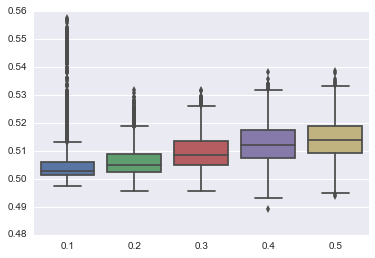

In [69]:
mcar = {'0.1': [], '0.2': [], '0.3': [], '0.4': [], '0.5': []}

for missing in scores['MCAR']:
    for results in scores['MCAR'][missing]:
        mcar[missing].extend(results['rfc'])
        
mcar_df = pd.DataFrame.from_dict(mcar)
sns.boxplot(mcar_df)

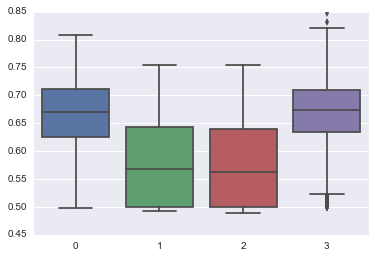

In [70]:
mar_df = pd.DataFrame.from_dict(scores['MAR'])
sns.boxplot(mar_df)

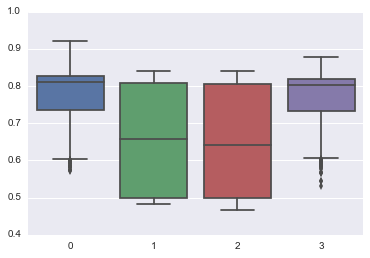

In [71]:
mnar_df = pd.DataFrame.from_dict(scores['MNAR'])
sns.boxplot(mnar_df)